# Plots

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [7]:
    
def plot_subresultsci(ql,sample,label):
    ql_rewards_means = np.mean(ql, axis=1)
    ql_rewards_stddev = np.std(ql, axis=1)

    plt.plot(range(sample-1),ql_rewards_means[:-1], label=label)
    plt.fill_between(range(sample-1), ql_rewards_means[:-1] + ql_rewards_stddev[:-1], ql_rewards_means[:-1] - ql_rewards_stddev[:-1], alpha=0.3)
    plt.ylim([0,None])
    plt.xlabel("Trials")
    plt.axvline(300, linestyle='--', color='grey')
    plt.legend()

# DP_EFE Agent vs PostDiction agent

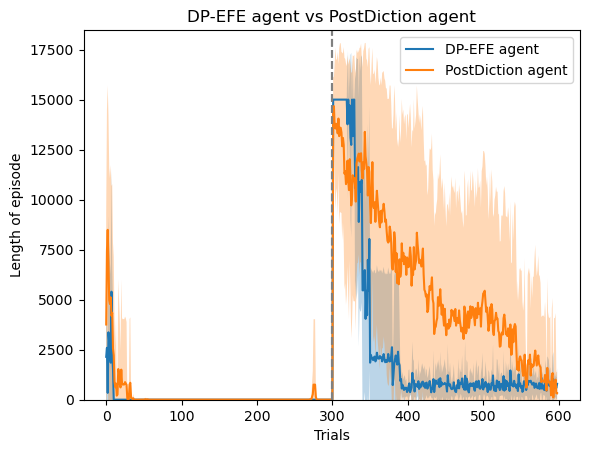

In [8]:
# Plotting
with open('data_DynProgagent.npy', 'rb') as file:
    t_length_1 = np.load(file)
    
with open('data_PostDicagent.npy', 'rb') as file:
    t_length_2 = np.load(file)

plot1 = plt.figure(1)
plot_subresultsci(np.transpose(t_length_1),np.shape(t_length_1[0])[0], label="DP-EFE agent")
plot_subresultsci(np.transpose(t_length_2),np.shape(t_length_2[0])[0], label='PostDiction agent')
plt.title("DP-EFE agent vs PostDiction agent")
plt.ylabel("Length of episode")
plt.savefig('Main_plot_mut.png', dpi=500, bbox_inches='tight')

# Combined model

<Figure size 640x480 with 0 Axes>

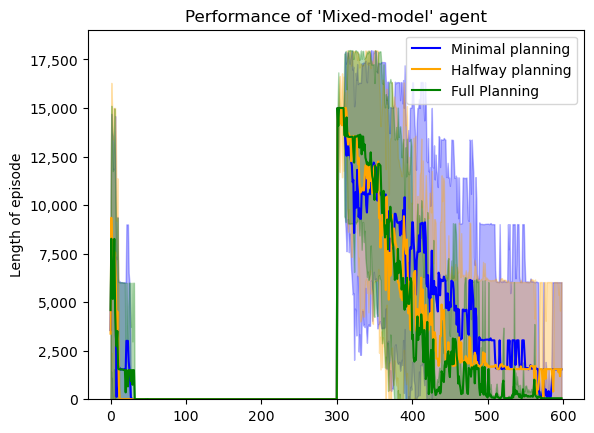

In [11]:
with open('data_Combinedmodel_zero.npy', 'rb') as file:
    t_length_1 = np.load(file)
    
with open('data_Combinedmodel_half.npy', 'rb') as file:
    t_length_2 = np.load(file)
    
with open('data_Combinedmodel_full.npy', 'rb') as file:
    t_length_3 = np.load(file)

plot1 = plt.figure(1)
#plot_subresultsci(np.transpose(t_length_1),np.shape(t_length_1[0])[0], label="Minimal-planning")
ql = np.transpose(t_length_1)
sample = np.shape(t_length_1[0])[0]
label="Minimal planning"
col='b'
ql_rewards_means = np.mean(ql, axis=1)
ql_rewards_stddev = np.std(ql, axis=1)

fig, ax = plt.subplots()
ax.plot(range(sample-1),ql_rewards_means[:-1], label=label, color = col)
ax.fill_between(range(sample-1), ql_rewards_means[:-1] + ql_rewards_stddev[:-1], ql_rewards_means[:-1] - ql_rewards_stddev[:-1], alpha=0.3, color = col)
ax.legend()
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

#plot_subresultsci(np.transpose(t_length_2),np.shape(t_length_2[0])[0], label="Halfway planning")
ql = np.transpose(t_length_2)
sample = np.shape(t_length_2[0])[0]
label="Halfway planning"
col='orange'
ql_rewards_means = np.mean(ql, axis=1)
ql_rewards_stddev = np.std(ql, axis=1)

ax.plot(range(sample-1),ql_rewards_means[:-1], label=label, color = col)
ax.fill_between(range(sample-1), ql_rewards_means[:-1] + ql_rewards_stddev[:-1], ql_rewards_means[:-1] - ql_rewards_stddev[:-1], alpha=0.3, color = col)
ax.legend()
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

#plot_subresultsci(np.transpose(t_length_3),np.shape(t_length_3[0])[0], label="Full Planning")
ql = np.transpose(t_length_3)
sample = np.shape(t_length_3[0])[0]
label="Full Planning"
col='g'
ql_rewards_means = np.mean(ql, axis=1)
ql_rewards_stddev = np.std(ql, axis=1)

ax.plot(range(sample-1),ql_rewards_means[:-1], label=label, color = col)
ax.fill_between(range(sample-1), ql_rewards_means[:-1] + ql_rewards_stddev[:-1], ql_rewards_means[:-1] - ql_rewards_stddev[:-1], alpha=0.3, color = col)
ax.legend()
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

plt.ylim([0,None])
plt.title("Performance of 'Mixed-model' agent")
plt.ylabel("Length of episode")
plt.savefig('CombModel_mut.png', dpi=500, bbox_inches='tight')

### Beta

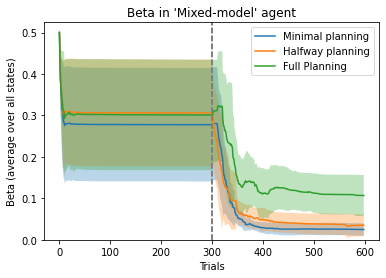

In [14]:
with open('Beta_zero.npy', 'rb') as file:
    Beta_zero = np.load(file)
with open('Beta_half.npy', 'rb') as file:
    Beta_half = np.load(file)
with open('Beta_full.npy', 'rb') as file:
    Beta_full = np.load(file)
    
plot1 = plt.figure(1)
plot_subresultsci(np.transpose(np.average(Beta_zero, axis = 2)), np.shape(Beta_zero[0])[0], label="Minimal planning")
plot_subresultsci(np.transpose(np.average(Beta_half, axis = 2)), np.shape(Beta_half[0])[0], label="Halfway planning")
plot_subresultsci(np.transpose(np.average(Beta_full, axis = 2)), np.shape(Beta_full[0])[0], label="Full Planning")
plt.ylabel("Beta (average over all states)")
plt.title("Beta in 'Mixed-model' agent")
plt.savefig('Beta_mut.png', dpi=500, bbox_inches='tight')

### Gamma

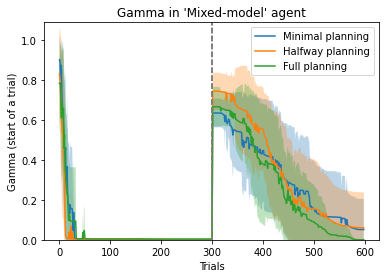

In [13]:
with open('Gamma_zero.npy', 'rb') as file:
    Gamma_zero = np.load(file)
    
with open('Gamma_half.npy', 'rb') as file:
    Gamma_half = np.load(file)
    
with open('Gamma_full.npy', 'rb') as file:
    Gamma_full = np.load(file)

plot1 = plt.figure(1)
plot_subresultsci(np.transpose(np.average(Gamma_zero, axis = 2)), np.shape(Gamma_zero[0])[0], label="Minimal planning")
plot_subresultsci(np.transpose(np.average(Gamma_half, axis = 2)), np.shape(Gamma_zero[0])[0], label="Halfway planning")
plot_subresultsci(np.transpose(np.average(Gamma_full, axis = 2)), np.shape(Gamma_zero[0])[0], label="Full planning")

plt.ylabel("Gamma (start of a trial)")
plt.title("Gamma in 'Mixed-model' agent")
plt.savefig('Gamma_mut.png', dpi=500, bbox_inches='tight')